# Is BorrowerAPR deteremined by any factors?
## by Sheila I. John


## Investigation Overview

This presentation will show the distribution of the original loan amount and how people borrow for their different categories(reasons). It will also show if any factors affect the borrower interest rate and what these factors are.


## Dataset Overview

This analysis is based on a data from Kaggle made available by Udacity. Prosper is an online peer-to-peer lending platform which matches borrowers (looking for personal loans between \\$2,000 and \\$40,000) with investors. The data set contains 113,937 loan listings with 81 variables. The variables are a mix of alpha and numeric. Most of the data is shared into pre-2009 and post-2009.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loandata=pd.read_csv('prosperLoanData.csv')


Below all cleaning steps carried out in this dataset are shown:

In [3]:
#datacleaning
#duplicate the data and work with clean copy
loandata_clean = loandata.copy()
#drop rows with irrelevant data which are mostly incomplete
loandata_clean = loandata_clean.drop(['TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanFirstDefaultedCycleNumber'], axis=1)
#convert date columns to correct data type - date/time
loandata_clean[['ListingCreationDate', 'ClosedDate', 'DateCreditPulled','LoanOriginationDate']] = loandata_clean[['ListingCreationDate', 'ClosedDate', 'DateCreditPulled','LoanOriginationDate']].apply(pd.to_datetime)
#replace all nan values in both columns with nothing 
loandata_clean['CreditGrade'] = loandata_clean['CreditGrade'].replace(np.NaN, '', regex=True)
loandata_clean['ProsperRating (Alpha)'] = loandata_clean['ProsperRating (Alpha)'].replace(np.NaN, '', regex=True)
#merge data from CreditGrade and ProsperRating (alpha) into new column LoanRating
loandata_clean["LoanRating"] = loandata_clean['CreditGrade'] + loandata_clean['ProsperRating (Alpha)']

#duplicate the ListingCatergory(numeric) column
loandata_clean['ListingCategory'] = loandata_clean.loc [:,'ListingCategory (numeric)']
#Replace the numeric listing catergory with the items the numbers represent
list = {0: 'Not Available',1:'Debt Consolidation',2:'Home improvement',3:'Business',4:'Personal Loan',5:'Student Use',
        6:'Auto',7:'Other',8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',11:'Engagement Ring',12:'Green Loans',
        13:'Household Expenses',14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',18:'Taxes',19:'Vacation',
        20:'Wedding Loans'}
loandata_clean["ListingCategory"] = loandata_clean["ListingCategory (numeric)"].map(list)

## Distribution of LoanOriginalAmount

The Original amount loaned peaks around \\$4,500. We can see highs at about \\$11,000 and \\$15,000. There is no smooth progression but there is quite a concentration on figures between \\$5,000 and \\$15,000 


Text(0.5,1,'Distribution of Original Loan Amount')

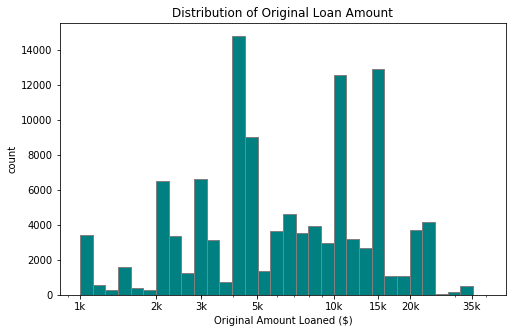

In [4]:
#convert to log to show readable distribution
log_binsize = 0.5
bins = 10 ** np.arange(3,4.6+0.05,0.05)


plt.figure(figsize=[8,5])
plt.hist(data=loandata_clean, x='LoanOriginalAmount', bins=bins, color="teal",ec="gray");
plt.xscale('log')
plt.xticks([1e3, 2e3,3e3, 5e3,1e4,1.5e4, 2e4, 3.5e4], ['1k','2k','3k','5k','10k','15k','20k','35k'])
plt.xlabel( 'Original Amount Loaned ($)')
plt.ylabel('count')
plt.title('Distribution of Original Loan Amount')

## Employment Status and Income range
Here's we see how many of the borrowers are employed and fot those who are employed we see which income group borrows the most.

Text(0.5,1,'No of Listings per Income Range')

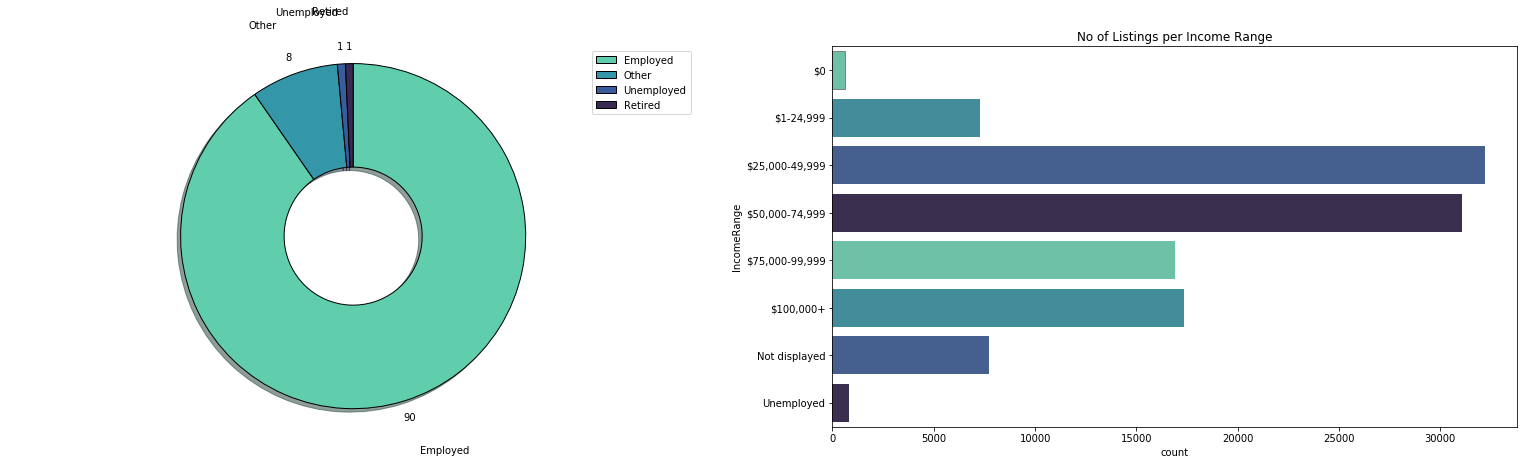

In [5]:
loandata_clean.replace(to_replace = ['Full-time','Part-time','Self-employed'], value = 'Employed', inplace=True)
loandata_clean.replace(to_replace = ['Not employed'], value = 'Unemployed', inplace=True)
loandata_clean.replace(to_replace = ['Not available',''], value = 'Other', inplace=True)

sorted_counts = loandata_clean['EmploymentStatus'].value_counts()
label = sorted_counts.index
mycolor = sb.color_palette("mako_r",n_colors=4)
plt.figure(figsize = [27,7])

#order the ratings in descending order 
rating_counts = loandata_clean['IncomeRange'].value_counts()
LoanRating_order = rating_counts.index

plt.subplot(1,2,1) 
plt.pie(sorted_counts, labels = label,colors = mycolor, startangle = 90,
      counterclock = False,autopct='%1.0f',pctdistance=1.1,labeldistance=1.3, shadow=True, wedgeprops = {'width':0.6, 'edgecolor':'black'});

plt.axis('equal')
plt.legend(label)

plt.subplot(1,2,2)
#order the ratings in descending order 
#rating_counts = loandata_clean['IncomeRange'].value_counts()
IncomeRange_order = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed','Unemployed']

#plot bar chart
sb.countplot(data = loandata_clean, y = 'IncomeRange',palette = mycolor, edgecolor ='gray',order=IncomeRange_order)
plt.title('No of Listings per Income Range')

## Listing Category
Here the listing categories have been put in words and we see for what reasons people borrow the most.


Text(0.5,1,'Reasons people take Loans')

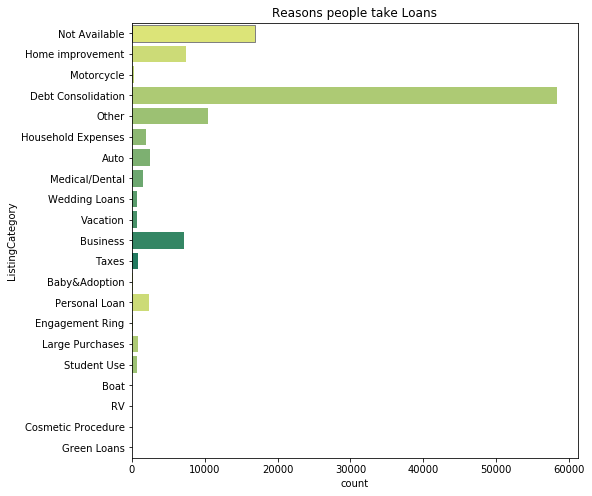

In [6]:
#plot horizontal bar chart without putting in ascending or descending order
mycolor = sb.color_palette("summer_r",n_colors=12)
plt.figure(figsize=[8,8])

sb.countplot(data=loandata_clean, y='ListingCategory', palette=mycolor, edgecolor='gray');
plt.title('Reasons people take Loans')

## BorrowerAPR vs IncomeRange
The central line shows the median value. From the chart it is clear that people who earn the most, have the lowest median borrower annual percentage rate 

Text(0.5,1,'Borrower APR by IncomeRange')

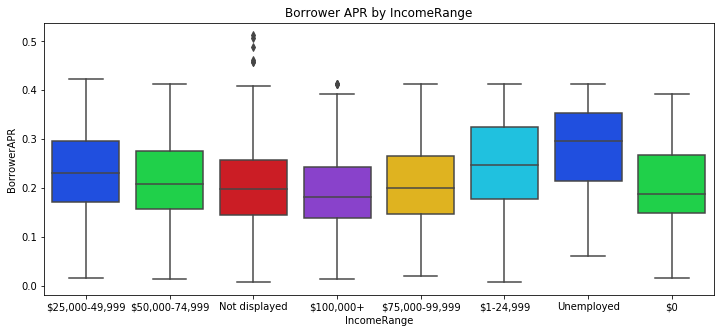

In [7]:
#income range vs borrowerAPR
mycolor = sb.color_palette("bright",n_colors=12)
plt.figure(figsize = [12,5])
sb.boxplot(data=loandata_clean, x='IncomeRange', y='BorrowerAPR',palette=mycolor)
plt.title('Borrower APR by IncomeRange')

## BorrowerAPR vs ProsperScore
There are quite some outliers here but the focus is on the median value. The results show that the less risk a borrower poses (that is the higher their prosper score), the less their interest rate. Perhaps this could be influenced by the investors confidence in the loan being repayed without default.

Text(0.5,1,'BorrowerAPR by Prosper score')

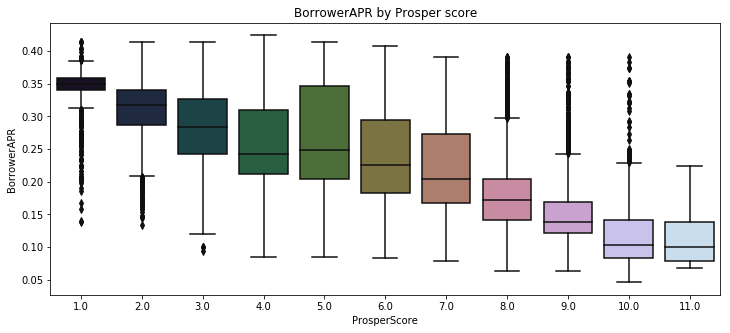

In [8]:
plt.figure(figsize = [12,5])
mycolor = sb.color_palette("cubehelix",n_colors=12)
sb.boxplot(data=loandata_clean, x='ProsperScore', y='BorrowerAPR',palette=mycolor)
plt.title('BorrowerAPR by Prosper score')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [9]:
!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_notebook.ipynb to slides
[NbConvertApp] Writing 437232 bytes to Part_II_notebook.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/conda/lib/python3.6/site-packages/nbconvert

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_notebook>.ipynb --to slides --post serve --no-input --no-prompt